In [1]:
import cv2
import numpy as np
from pathlib import Path
import os
import matplotlib.pyplot as plt

In [2]:
current_dir = Path(os.getcwd())
image_path = current_dir.parent / "images" / "kbskl.jpeg"

In [27]:
image = cv2.imread(str(image_path))
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [31]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

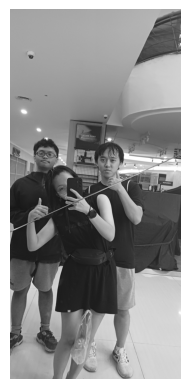

In [34]:
plt.imshow(gray, cmap="gray")
plt.axis("off")
plt.show()

In [35]:
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

In [37]:
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

In [38]:
sure_bg = cv2.dilate(opening, kernel, iterations=3)

In [40]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 25, 0)
sure_fg = np.uint8(sure_fg)

In [41]:
unknown = cv2.subtract(sure_bg, sure_fg)

In [42]:
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

In [43]:
markers = cv2.watershed(image, markers)
image[markers == -1] = [0,255,255]

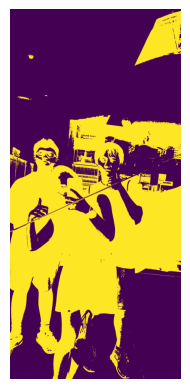

In [45]:
plt.imshow(thresh)
plt.axis("off")
plt.show()